# Homework 4 - Andrea Lazzari


1) Generate a random a $SxS$ matrix with $C$ non zero entries and $1-C$ zeros ($C$ is between zero and one). Set the diagonal to $-d$. The non-zero elements are drawn  from a given distributions. 
Calculate the eigenvalues. Repeat different realizations and plot all the eigenvalues in the complex plane [Real part (x-axis) and imaginary part (y-axis)]. Compare this result with the expectations from the circular law. 

1) Generate the same as above but for mutualistic structure and find how the maximum real eigenvalues scales with $S$ (use $S=20,30,40,...,100$) and compares your numerical finding with the analytical expectations. 

2) Analyse the food web using the metrics we have seen in class. The file `Food-web-Dataset-PNAS-05.xls` represent the weighted adjacency matrix of the food web.
For the analysis you can binarize (zero and one) the matrix. 

1) Optional: calculate the same as 1) but with for the cascade model or for the nested mutualistic network. You follow detailed step by step explanation in the "Homework-detail-week3-from-Allesina-Stability-Criteria-2012-Nature.pdf" (also uploaded in the Google Drive, note folder)

---

## Circular law

Given a $ S x S$ matrix not symmetric random matrix $M = \{m_{ij}\}\rvert_{i,j=1,\dots,S}$ whose entries are independent and identically distributed (i.i.d.) random variables with zero mean 
$ \mathbb{E}(m_{ij}) = 0$ and variance $\sigma^2_{m_{ij}} = 1$, the circular law states that the eigenvalues of $\dfrac{M}{\sqrt{S}}$ are distributed uniformly on the unitary disk in the complex plane.

---

### Random Matrix - Symmetric case 

In the random case, we construct the matrices in the following way: 
*  For each off-diagonal coefficient $\big(M_{ij}\big)\rvert_{i \neq j}$ , we draw a random value $p$ from a uniform distribution $\mathcal{U}[0, 1]$. 
*  If the value is $p \leq C$, we set coefficient $M_{ij}$ by sampling it from $\mathcal{N}(0, \sigma^2)$.
*  Otherwise $p > C$ , $M_{ij} = 0$.
* All diagonal terms, $M_{ii}$, are set to $−d$. 

These matrices, for large $S$, generate a precise mixture of interaction types, with predator-prey interactions being represented twice as frequently as mutualistic or competitive ones.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
def random_matrix(S, C, d , pdf , parameters):
    # Generate a random a SxS matrix with non zero entries with probability of C 
    # with diagonal equal to -d
    
    #S : size of the matrix
    #C : probability of non zero entries
    #d : (-)diagonal value
    #pdf : probability distribution function (NumPy)
    #parameters : parameters of the pdf (Dict)
    
    # Generate a random a SxS matrix from probability distribution pdf(parameters)
    mat = pdf(size=(S,S), **parameters)
    
    # Set diagonal to -d
    np.fill_diagonal(mat, -d)
    
    # Set the off-diagonal entries to zero if the uniformly drawn p is > C
    mat[np.triu(np.random.uniform(size = (S, S)), k = 1) > C]=0
    mat[np.tril(np.random.uniform(size = (S, S)), k = -1) > C]=0
    
    
    return mat

In [3]:
S = 100      #dimension of the matrix
C = 0.72     #probability of non zero entries
d = 2        #diagonal value d

std = 1      #standard deviation of the normal distribution

dist = np.random.normal
par = {'loc': 0, 'scale' : std}      # parameters of the normal pdf

repetitions = 1000    #number of repetitions

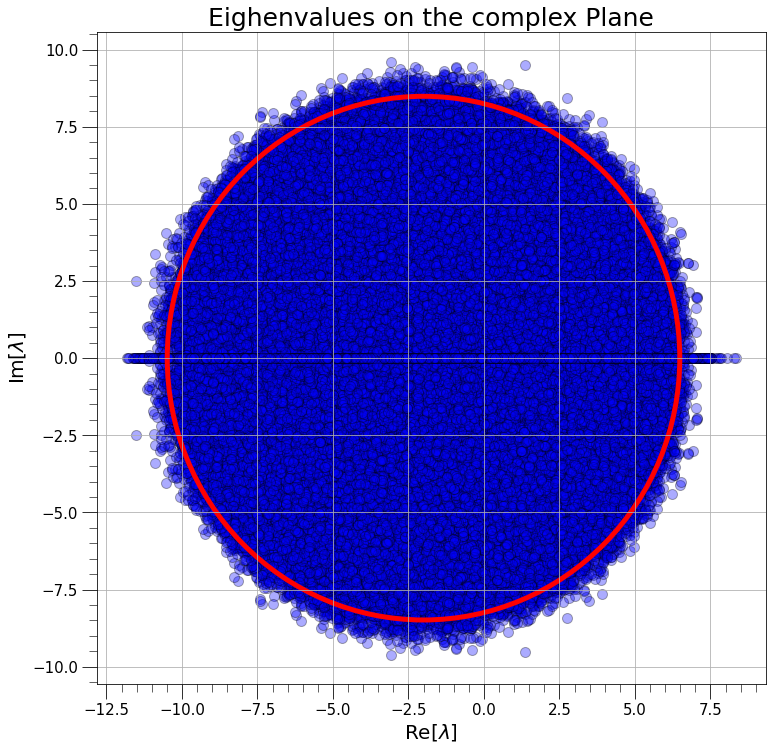

In [4]:

circle = plt.Circle((-d,0), np.sqrt(S*C*std**2), color='red', fill=False, linewidth=5)  

fig, ax = plt.subplots(1, 1, figsize=(12, 12))

for i in range(repetitions):

    r_mat = random_matrix(S , C , d , dist , parameters=par)    #random SxS matrix 

    eighenvalues, _ = np.linalg.eig(r_mat)
    ax.scatter(np.real(eighenvalues), np.imag(eighenvalues), s=100, edgecolors='black', color='blue', alpha=0.33)
    

ax.add_patch(circle)
ax.set_title('Eighenvalues on the complex Plane', fontsize = 25)    
ax.set_xlabel('Re[$\\lambda$]', fontsize = 20)
ax.set_ylabel('Im[$\\lambda$]', fontsize = 20)         


ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

ax.get_xaxis().set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.tick_params(axis='both', which='major', labelsize=15, length=15)

ax.tick_params(axis='both', which='minor', labelsize=15, length=8)
ax.grid(zorder = 1)
ax.minorticks_on()

As we expected from the **Circular Law**, from this plot we can see that the eigenvalues are distributed in a disk (the red line) with radius $$ r = \sqrt{S \cdot C \cdot \sigma^2} $$

---

## Mutualistic Case

Here we introduced correlations between each species.
Analytically we found that the eighenvalues of the matrix are distributed on an ellipse with semi-axis dependent on the number of species $S$ and the correlation coefficient $\rho$:
$$ \begin{cases}
 a = \sqrt{S \cdot V} \cdot (1 + \rho) \\
 b = \sqrt{S \cdot V}\cdot (1 - \rho) \\

\end{cases}$$


Having defined as $V = Var(M_{ij})$ and $\rho = \dfrac{\mathbb{E}[M_{ij}, M_{ji}] - \mathbb{E}^2[M_{ij}]}{Var(M_{ij})}$

### Random Matrix - Mutualistic Case
*  For each pair of interactions $\big(M_{ij}, M_{ji} \big)\rvert_{i > j}$ , we draw a random value $p$ from a uniform distribution $\mathcal{U}[0, 1]$. 
*  If the value is $p \leq C$, we draw $M_{ij}$ and $M_{ji}$ independently from a half-normal distribution $ |x| \sim |\mathcal{N}(0, \sigma^2)|$.
*  Otherwise $p > C$ , $M_{ij} = 0 \quad \text{and} \quad M_{ji} = 0$.
* All diagonal terms, $M_{ii}$, are set to $−d$. 


Therefore, in order to compute $\mathbb{E}[M_{ij}]$, we notice that in our case it is $C \cdot \mathbb{E}[|x|]$ which is the first moment of the distribution:

$$ \mathbb{E}[|x|] = \int_{-\infty}^{+\infty} |x| \cdot P(x) dx = \int_{-\infty}^{+\infty} dx \quad |x| \cdot \dfrac{1}{\sqrt{2\pi\sigma^2}} \cdot e^\frac{(x-0)^2}{2\sigma^2} = \dfrac{2}{\sqrt{2\pi\sigma^2}} \cdot \int_{0}^{+\infty} dx \quad |x| \cdot  e^\frac{x^2}{2\sigma^2} $$

With some algebraic manipulation we can find that:

$$ \mathbb{E}[|x|] = \dfrac{2 \sigma}{\sqrt{2\pi}} \quad \rightarrow \quad \boxed{\mathbb{E}[M_{ij}] = C \cdot \dfrac{2 \sigma}{\sqrt{2\pi}}}$$

Similarly we have:
$$ \mathbb{E}[M_{ij}, M_{ji}] = C \cdot \mathbb{E}^2[|x|] \quad \rightarrow \quad 
\boxed{\mathbb{E}[M_{ij}, M_{ji}] = C \cdot \dfrac{2 \sigma^2}{\pi}}
$$

$$V = Var(M_{ij}) = \mathbb{E}[M_{ij}^2] - \mathbb{E}^2[M_{ij}] = C \cdot \sigma^2 - C^2 \cdot \dfrac{2 \sigma^2}{\pi} \quad \rightarrow \quad \boxed{ Var(M_{ij}) = C \cdot \sigma^2 \bigg( 1 - \dfrac{2C}{\pi} \bigg)}$$

Consequentiallly, we have that:

$$\rho = \dfrac{\mathbb{E}[M_{ij}, M_{ji}] - \mathbb{E}^2[M_{ij}]}{Var(M_{ij})} \quad \rightarrow \quad 

\rho = \dfrac{C \cdot \dfrac{2 \sigma^2}{\pi} - C^2 \cdot \dfrac{2\sigma^2}{\pi} }{C \cdot \sigma^2 \bigg( 1 - \dfrac{2C}{\pi} \bigg)}

\quad \rightarrow \quad
\boxed{\rho = \dfrac{1 - C}{ \dfrac{\pi}{2}-C}}$$

We can also compute the variance of the matrix $M_{ij}$:



Having the correlation coefficient $\rho$, this mutualistic case follows the elliptic law $V$. 

In fact in the complex plane, the eighenvalues lie on an ellipse whose semi-axis are:
$$

\begin{cases}
 a = \sqrt{S \cdot V} \cdot (1 + \rho) \\                     
 b = \sqrt{S \cdot V}\cdot (1 - \rho) \\
\end{cases}

\quad \rightarrow \quad

\boxed{
\begin{cases}
 a = \sqrt{S \cdot C \cdot \sigma^2 \big( 1 - \dfrac{2C}{\pi} \big)} \cdot \bigg(1 + \dfrac{1 - C}{ \frac{\pi}{2}-C} \bigg) \\
 \\                       
 b = \sqrt{S \cdot C \cdot \sigma^2 \big( 1 - \dfrac{2C}{\pi} \big)}\cdot \bigg(1 - \dfrac{1 - C}{ \frac{\pi}{2}-C}\bigg) \\
\end{cases}
}
 $$


The mean of the distribution is not zero, but it is $C \cdot \mathbb{E}[|x|]$, this lead to an eighenvalue that is a sort of "outlier" at 
$$
Re (\lambda) = -d (S-1) \cdot C \cdot \mathbb{E}[|x|] = -d (S-1) \cdot C \cdot \dfrac{2 \sigma}{\sqrt{2\pi}}
$$.

In [5]:
def random_matrix_mutualistic(S, C, d , pdf , parameters):
    
    # Generate a random a SxS matrix with mij and mji non zero entries with probability of C 
    # with diagonal equal to -d
    #S : size of the matrix
    #C : probability of non zero entries
    #d : (-)diagonal value
    #pdf : probability distribution function (NumPy)
    #parameters : parameters of the pdf (Dict)
    
    
    #generate a SxS matrix of 0 with prob 1-C and 1 with probability C                                       
    A = np.random.choice([0,1], size=(S,S), p=[1-C, C])   

    A = np.triu(A, k=1)      #set the lower triangular part to 0
    rand_mat = A + A.T       #set the lower triangular part specularly w.r.t. the upper triangular part
    
    # Generate a random a SxS matrix from probability distribution pdf(parameters)
    norm_mat = pdf(size=(S,S), **parameters)
    
    
    random_mutual_mat = norm_mat*rand_mat            #multiply the two matrices in order to have the desired distribution on mij and mji
    
    random_mutual_mat = np.abs(random_mutual_mat)    #absolute value of the matrix
    
    np.fill_diagonal(random_mutual_mat, -d)          #set the diagonal to -d
    
    return random_mutual_mat

In [6]:
S = 100      #dimension of the matrix
C = 0.72     #probability of non zero entries
d = 2        #diagonal value d

std = 1      #standard deviation of the normal distribution

dist = np.random.normal
par = {'loc': 0, 'scale' : std}      # parameters of the normal pdf

realizations = 1000    #number of repetitions


In [7]:
print(f'We expect the system to be unstable as the real part of the "outlier" eigenvalue is: \
      { -d + (S - 1) * C * ((2 * std) / (np.sqrt(2 * np.pi))):.3f}') 

print(f'\nThe expected ellipse center is : ( {-d - C * (2 * std)/ np.sqrt(2 * np.pi):.3f} , 0 )')

We expect the system to be unstable as the real part of the "outlier" eigenvalue is:       54.873

The expected ellipse center is : ( -2.574 , 0 )


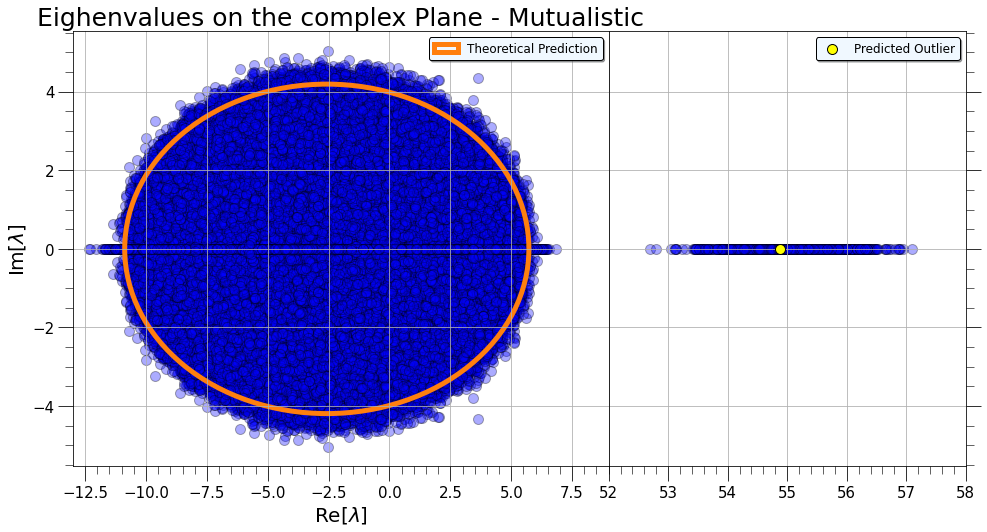

In [8]:
V = C * std**2 * (1 - (2*C)/ np.pi)
rho =(1-C)/((np.pi/2) - C)

ellipse = matplotlib.patches.Ellipse(xy = (-d - C * (2 * std)/ np.sqrt(2 * np.pi), 0) ,
                                     width = 2 * np.sqrt(S*V)*(1 + rho),
                                     height = 2 * np.sqrt(S*V)*(1 - rho), 
                                                color = 'C1', fill=False, linewidth=5, label='Theoretical Prediction')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 8), sharey=True, gridspec_kw={'wspace': 0, 'width_ratios': [3, 2]})
ax1.set_xlim(-13, 9)
ax2.set_xlim(52, 58)
ax2.yaxis.tick_right()

for i in range(repetitions):

    r_mat = random_matrix_mutualistic(S , C , d , dist , parameters=par)    #random SxS matrix - mutualistic case

    eighenvalues, _ = np.linalg.eig(r_mat)
    
    ax1.scatter(np.real(eighenvalues), np.imag(eighenvalues), s=100, edgecolors='black', color='blue', alpha=0.33)
    ax2.scatter(np.real(eighenvalues), np.imag(eighenvalues), s=100, edgecolors='black', color='blue', alpha=0.33)

ax1.add_patch(ellipse)
ax2.scatter(-d + (S - 1) * C * ((2 * std) / (np.sqrt(2 * np.pi))), 0, edgecolor = 'black',
            color = 'yellow', s = 100, zorder = 3, label='Predicted Outlier')

ax1.set_title('Eighenvalues on the complex Plane - Mutualistic', fontsize = 25)    
ax1.set_xlabel('Re[$\\lambda$]', fontsize = 20)
ax1.set_ylabel('Im[$\\lambda$]', fontsize = 20)         

for ax in [ax1,ax2]:
    ax.legend(facecolor = 'aliceblue', edgecolor = 'black', shadow = True, fontsize = 12)
    ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

    ax.get_xaxis().set_minor_formatter(matplotlib.ticker.NullFormatter())
    ax.tick_params(axis='both', which='major', labelsize=15, length=15)
    ax.tick_params(axis='both', which='minor', labelsize=15, length=8)
    
    ax.grid(zorder = 1)
    ax.minorticks_on()


Here we can see that the eigenvalues are distributed on the ellipse predicted by the theory (orange line) and, in addition, the theoretical value of the outlier respects the expectations.

---

## Scaling of the Maximum Eighenvalue

In this part we will study the scaling of the maximum real eighenvalue $\lambda_{max}$ with different number of species $S = [20 , \dots, 100]$.

The condition:

$$ max \big\{ \sqrt{S \cdot V} \cdot (1 \pm \rho) - C \mu -d \quad , \quad (S-1) \cdot C \mu - d \big\} $$

due to the found correlation coefficient $\rho = \bigg( \dfrac{1 - C}{ \dfrac{\pi}{2}-C} \bigg) > 0 $ in the considered mutualistic framework becomes:

$$ max \bigg\{ \sqrt{S \cdot V} \cdot \bigg( 1 + \dfrac{1 - C}{ \dfrac{\pi}{2}-C} \bigg) -C \mu -d \quad , \quad (S-1) \cdot C \mu -d\bigg\} \quad \downarrow \quad 
\\
  \boxed{ max \bigg\{ \sqrt{S \cdot C \cdot \sigma^2 \bigg( 1 - \dfrac{2C}{\pi}\bigg)} \cdot \bigg( 1 + \dfrac{1 - C}{ \dfrac{\pi}{2}-C} \bigg) -C \cdot \dfrac{2 \sigma}{\sqrt{2\pi}} -d \quad , \quad (S-1) \cdot C \cdot \dfrac{2 \sigma}{\sqrt{2\pi}}  -d \bigg\}}
$$


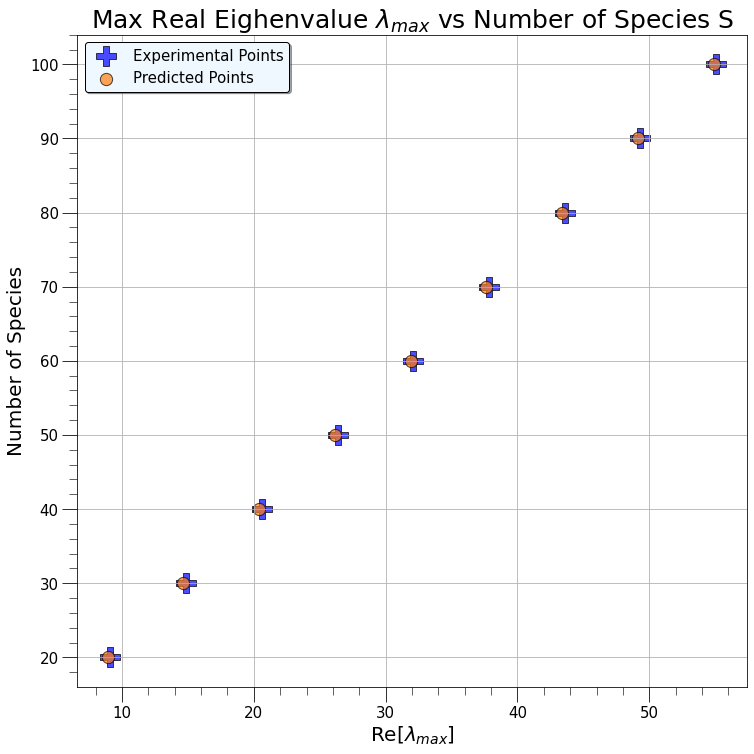

In [9]:
V = C * std**2 * (1 - (2*C)/ np.pi)
rho =(1-C)/((np.pi/2) - C)
mu = (2*std)/(np.sqrt(2*np.pi))


fig, ax = plt.subplots(1, 1, figsize=(12, 12))


for S in range(20,101,10):
      max_eig_list = []
      
      for i in range(repetitions):

            r_mat = random_matrix_mutualistic(S , C , d , dist , parameters=par)    #random SxS matrix -mutualistic case

            eighenvalues, _ = np.linalg.eig(r_mat)
            
            max_eig_list.append(np.max(np.real(eighenvalues)))
      
      if S == 100:
            label = ['Experimental Points', 'Predicted Points' ] 
      else:
            label = [None, None]
           
      ax.scatter(np.mean(max_eig_list), S, s=400, marker='P', edgecolors='black', color='blue', alpha=0.7,label = label[0])
      ax.scatter(np.max( np.array([ (np.sqrt(S*V)*(1 + rho)- C*mu -d) , ((S-1)*C*mu -d) ] )), S, s=150, 
                 edgecolors='black', color='C1', alpha=0.7, label=label[1])
      

ax.set_title('Max Real Eighenvalue $\\lambda_{max}$ vs Number of Species S', fontsize = 25)    
ax.set_xlabel('Re[$\\lambda_{max}$]', fontsize = 20)
ax.set_ylabel('Number of Species', fontsize = 20)         

ax.legend(facecolor = 'aliceblue', edgecolor = 'black', shadow = True, fontsize = 15)

ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

ax.get_xaxis().set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.tick_params(axis='both', which='major', labelsize=15, length=15)

ax.tick_params(axis='both', which='minor', labelsize=15, length=8)
ax.grid(zorder = 1)
ax.minorticks_on()



As expected from the boxed condition above for the maximum eighenvalue the term that dominates is the second one:
$$ (S-1) \cdot C \cdot \dfrac{2 \sigma}{\sqrt{2\pi}}  -d $$ 

therefore the scaling is linear with the number of species $S$.

---

## Food Web Analysis

Dealing with food chains, we have a hierarchical structures of predations:
* **T**: the Top predator
* **I**: the Intermediate predators
* **B**: the Basal species, the prey that not predates, sort of the ground zero resources

The food web is represented by a directed graph $G = (V, L)$, where $V$ is the set of nodes and $L$ is the set of edges (Links). Each node $v \in V$ represents a species and each edge $l \in L$ represents a predation relationship.

This graph can be mapped to an adjacency matrix $A$, a square matrix of size $n \times n$ where $n = |V|$ is the number of nodes. The entry $a_{ij}$ is equal to $1$ if there is a predation relationship between $i$ and $j$, otherwise it is equal to $0$.

$$ \begin{cases}
a_{ij} = 1 \quad \text{if } \quad j \text{  predates  }i\\
a_{ij} = o \quad \text{if } \quad j,i \text{  do NOT interact}
\end{cases} 
$$

From this matrix A $\big\{a_{ij} \big\}$, with $L$ the number of the links and $S$ the number of species, we can compute some interesting metrics, for example:

* **Generality** : How many different preys, one specific specie $i$ of predator predates
  $$ G_i = \sum_{j=1}^{S} \dfrac{a_{ji}}{L \cdot S}$$

* **Vulnerability**: From how many species of predators, one specific specie $i$ of prey is predated
  $$ V_i = \sum_{j=1}^{S} \dfrac{a_{ij}}{L \cdot S}$$

Looking for trophic similarities, we can compute how many nodes of overlap there are between two species $i$ and $j$:
  $$ S_{ij} = \sum_{k=1}^{S} \dfrac{1}{S} \cdot \bigg( \underbrace{a_{ik} \cdot a_{kj}}_{\text{overlap of prey}} + \underbrace{a_{ik} \cdot a_{jk}}_{\text{overlap of predator}}  \bigg)$$

Defining the **trophic level** as the position level in the food chain, we can compute it for each species $i$:
  $$ S\underbrace{(i)}_{i \neq B} = 1 + \dfrac{1}{K^{in}} \cdot \bigg( \sum_{j=1}^{S} a_{ji} \cdot S(j) \bigg)$$
  
Where $K^{in}$ represents the number of incoming links to species $i$, the number of species that $i$ predates

Finally, we can define the **Trophic Coherence** $q$ as the number of nodes that fall inot distinct levels of the network.

Assuming random variable $X_{ij} = S_i - S_j$ (the distance between the trophic levels of species $i$ and $j$) we can choose the right distribution such that $<X_{ij}> = 1 $, we have:

$$ q = \sqrt{<X^2> - <X>^2} \quad = \quad \sqrt{\sum_{ij} a_{ij} \cdot X_{ij}^2 - 1}$$

---

In [10]:
import pandas as pd

In [11]:
df_food = pd.read_excel('Food-web-Dataset-PNAS-05.xls', header = 0, index_col = 0)

#Binarize the food web matrix
df_food[df_food > 0] = 1
df_food = df_food.astype(int)

df_food.index = df_food.index.str.strip()
df_food.columns = df_food.columns.str.strip()

In [12]:
df_food.head()

,D1,A1,A2,A3,I1,I2,I3,I4,I5,I6,...,F199,F200,F201,F202,F203,F204,F205,F206,F207,F208
prey\predator,,,,,,,,,,,,,,,,,,,,,
D1,0,0,0,0,0,1,1,1,1,1,...,0,0,0,0,0,0,0,1,1,0
A1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
A2,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
A3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
I1,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [13]:
#Define the adjacency matrix A

A_mat = np.array(df_food)

S = df_food.shape[0]    #number of Species S
L = np.sum(A_mat)     #number of Links L


In [14]:
#Generality
gen = np.sum(A_mat, axis=0)/(L*S)
display(pd.DataFrame(gen, index = df_food.index, columns = ['Generality']))

,Generality
prey\predator,
D1,0.000000
A1,0.000000
A2,0.000000
A3,0.000000
I1,0.000002
...,...
F204,0.000032
F205,0.000000
F206,0.000021


<function matplotlib.pyplot.show(close=None, block=None)>

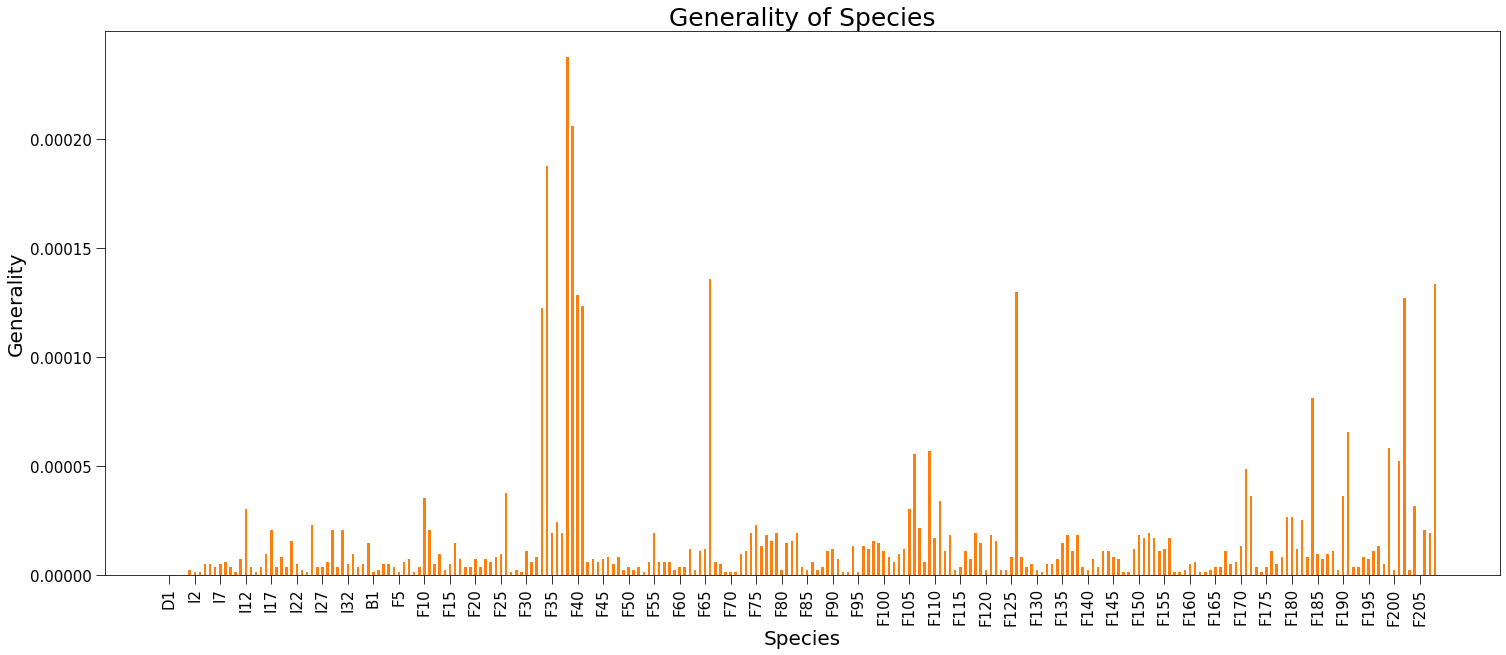

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(25, 10))

ax.bar(df_food.index, gen, color = 'C1', width = 0.5)

ax.set_title('Generality of Species', fontsize = 25)    
ax.set_xlabel('Species', fontsize = 20)
ax.set_ylabel('Generality', fontsize = 20)   
  
ax.set_xticks(np.arange(len(df_food.index))[::5])
ax.set_xticklabels(df_food.index[::5], rotation=90)
ax.tick_params(axis='both', which='major', labelsize=15, length=9)

plt.show

In [15]:
#Vulnerability
vuln = np.sum(A_mat, axis=1)/(L*S)
display(pd.DataFrame(vuln, index = df_food.index, columns = ['Vulnerability']))

,Vulnerability
prey\predator,
D1,0.000059
A1,0.000085
A2,0.000036
A3,0.000015
I1,0.000028
...,...
F204,0.000008
F205,0.000016
F206,0.000005


<function matplotlib.pyplot.show(close=None, block=None)>

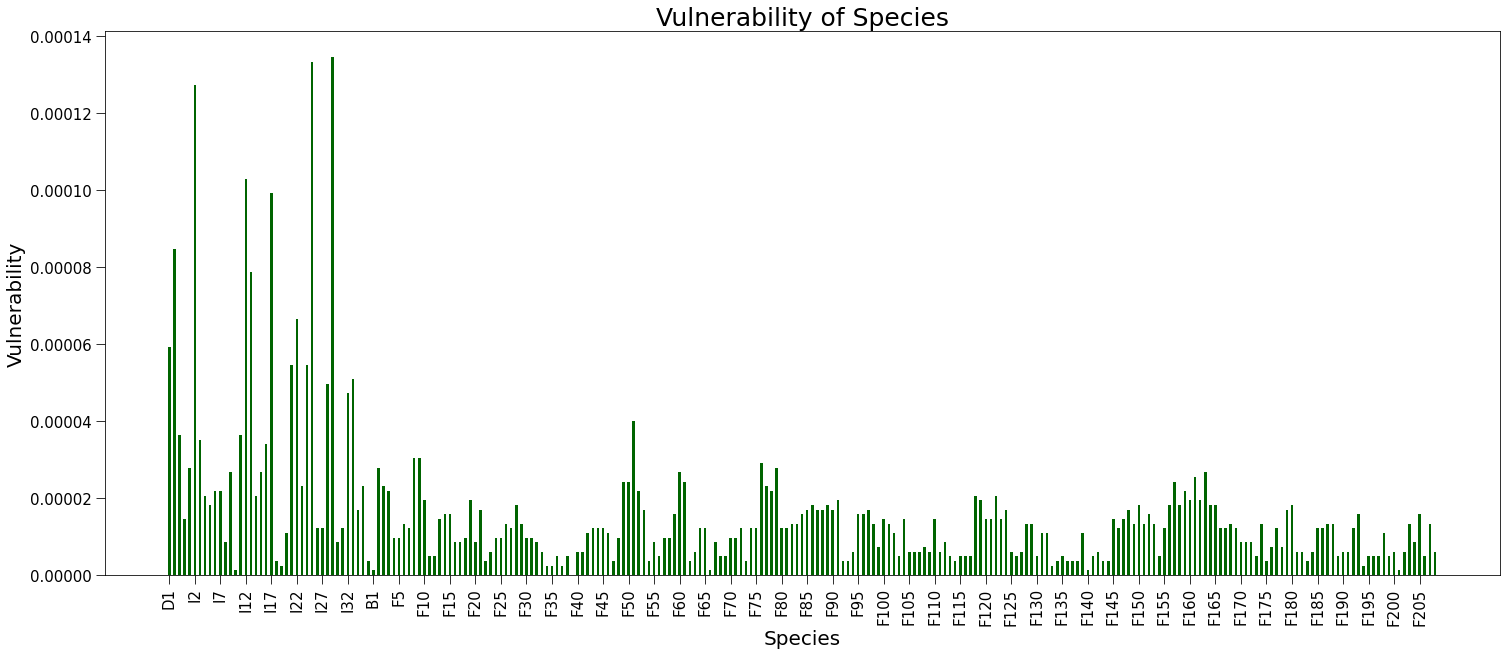

In [98]:
fig, ax = plt.subplots(1, 1, figsize=(25, 10))

ax.bar(df_food.index, vuln, color = 'darkgreen', width = 0.5)

ax.set_title('Vulnerability of Species', fontsize = 25)    
ax.set_xlabel('Species', fontsize = 20)
ax.set_ylabel('Vulnerability', fontsize = 20)   
  
ax.set_xticks(np.arange(len(df_food.index))[::5])
ax.set_xticklabels(df_food.index[::5], rotation=90)
ax.tick_params(axis='both', which='major', labelsize=15, length=9)

plt.show

In [16]:
#Overlap

over_prey = np.dot( A_mat.T, A_mat )
    
over_predator =  np.dot( A_mat, A_mat.T )

overlap = (1/S) * (over_prey + over_predator)

print("The Matrix containing the overlaps is: \n")
display(pd.DataFrame(overlap, index = df_food.index, columns = df_food.index))

The Matrix containing the overlaps is: 



prey\predator,D1,A1,A2,A3,I1,I2,I3,I4,I5,I6,...,F199,F200,F201,F202,F203,F204,F205,F206,F207,F208
prey\predator,,,,,,,,,,,,,,,,,,,,,
D1,0.196787,0.116466,0.052209,0.040161,0.052209,0.132530,0.032129,0.036145,0.016064,0.024096,...,0.004016,0.004016,0.004016,0.008032,0.008032,0.004016,0.008032,0.000000,0.004016,0.008032
A1,0.116466,0.281124,0.096386,0.008032,0.032129,0.136546,0.108434,0.064257,0.052209,0.060241,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004016,0.000000
A2,0.052209,0.096386,0.120482,0.000000,0.024096,0.068273,0.060241,0.052209,0.044177,0.040161,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A3,0.040161,0.008032,0.000000,0.048193,0.028112,0.048193,0.008032,0.004016,0.004016,0.004016,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
I1,0.052209,0.032129,0.024096,0.028112,0.100402,0.068273,0.016064,0.016064,0.012048,0.012048,...,0.004016,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004016,0.004016,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F204,0.004016,0.000000,0.000000,0.000000,0.000000,0.004016,0.000000,0.000000,0.000000,0.000000,...,0.096386,0.024096,0.064257,0.060241,0.024096,0.132530,0.024096,0.012048,0.008032,0.060241
F205,0.008032,0.000000,0.000000,0.000000,0.000000,0.004016,0.000000,0.000000,0.000000,0.000000,...,0.012048,0.016064,0.004016,0.012048,0.044177,0.024096,0.052209,0.016064,0.032129,0.012048
F206,0.000000,0.000000,0.000000,0.000000,0.004016,0.008032,0.004016,0.012048,0.012048,0.008032,...,0.008032,0.008032,0.004016,0.016064,0.008032,0.012048,0.016064,0.084337,0.060241,0.016064


In [70]:
k_in = {df_food.index[x].strip(): np.sum(df_food.iloc[:,x]) for x in range(S)}    #in-degree

k_in_sorted = dict(sorted(k_in.items(), key=lambda x: x[1]))  #sorted in-degree

display(pd.DataFrame.from_dict(k_in_sorted, orient='index', columns = ['In-degree']))

,In-degree
D1,0
A1,0
A2,0
A3,0
F205,0
...,...
F208,110
F66,112
F34,155
F39,170


In [93]:
#Defining the trophic level of each species in a recursive way

def trophic_level(df_food , df, inc_link, s):
    
    if inc_link[s] == 0:
        df.loc[s,'Trophic_Level'] = 1
        return
    
    df.loc[s,'Trophic_Level'] = 1
    sp_con = df_food.index[df_food.loc[:,s] == 1].tolist()
    
    for i in sp_con:
        if df.loc[i,'Trophic_Level'] == 0:
            trophic_level(df_food , df, inc_link, i)

        df.loc[s,'Trophic_Level'] += df.loc[i,'Trophic_Level']/(inc_link[s])
        
    return
        

In [96]:
df = pd.DataFrame.from_dict(k_in, orient='index', columns=['in-degree'])
df['Trophic_Level'] = np.zeros_like(df.index)

species = list(df.index)

for s in species:
    if df.loc[s,'Trophic_Level'] == 0:
        trophic_level(df_food , df, k_in, s)

df

,in-degree,Trophic_Level
D1,0,1
A1,0,1
A2,0,1
A3,0,1
I1,2,2.5
...,...,...
F204,26,4.743971
F205,0,1
F206,17,3.557709
F207,16,3.579289


<function matplotlib.pyplot.show(close=None, block=None)>

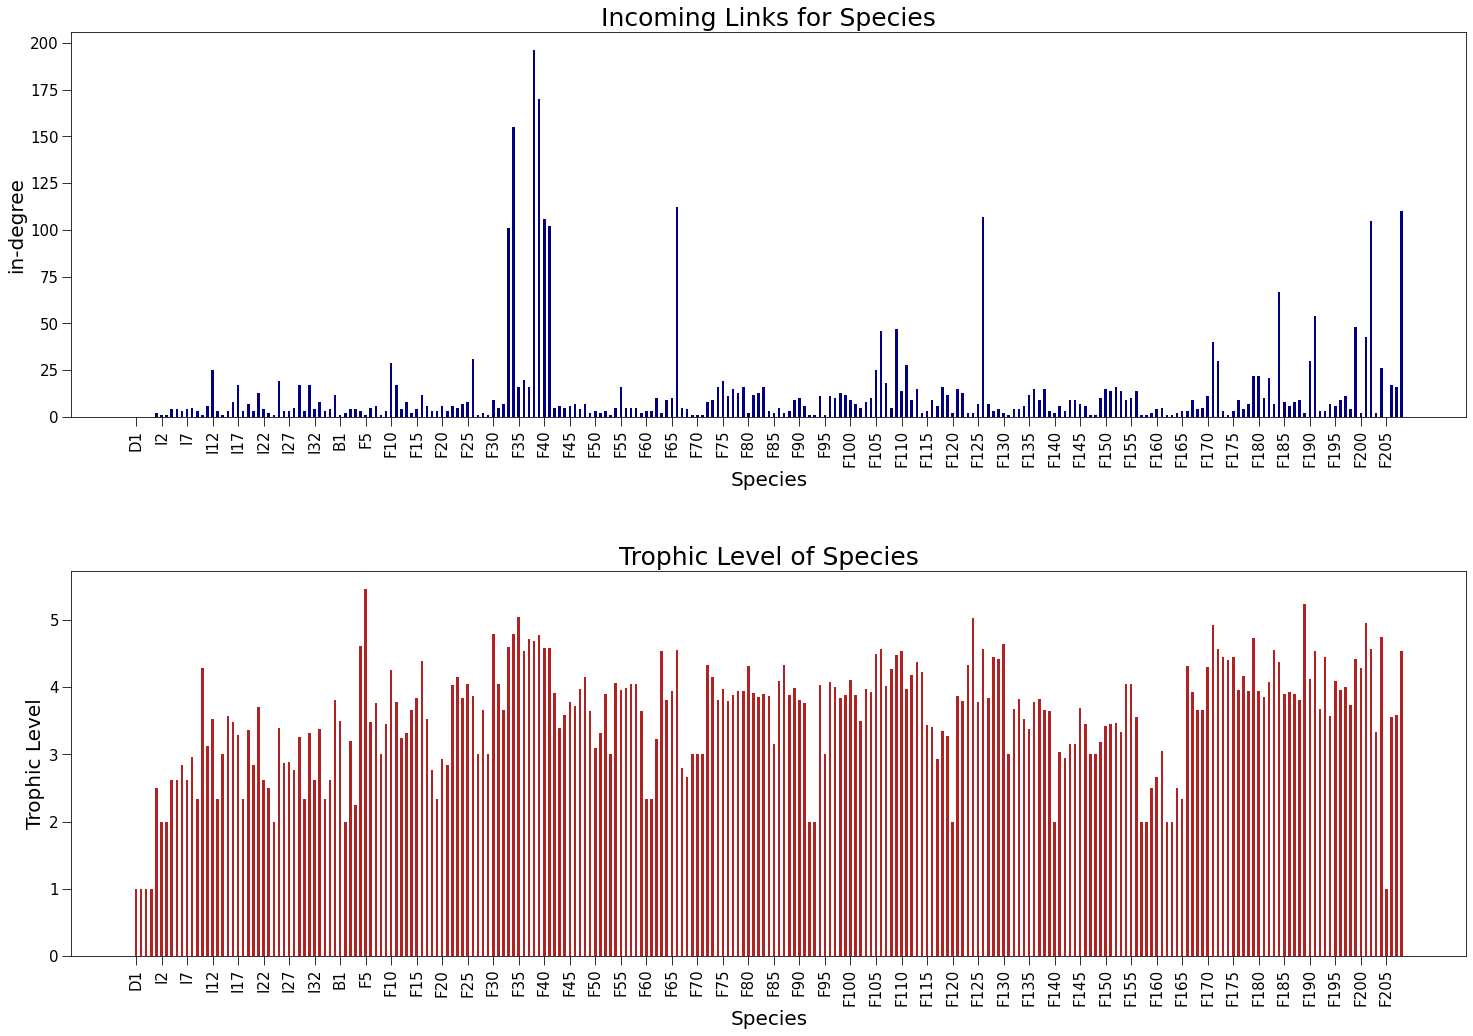

In [113]:
fig, ax = plt.subplots(2, 1, figsize=(25, 17))

ax[0].bar(df.index, df['in-degree'], color = 'navy', width = 0.5)

ax[0].set_title('Incoming Links for Species', fontsize = 25)    
ax[0].set_xlabel('Species', fontsize = 20)
ax[0].set_ylabel('in-degree', fontsize = 20)   
  
ax[0].set_xticks(np.arange(len(df.index))[::5])
ax[0].set_xticklabels(df.index[::5], rotation=90)
ax[0].tick_params(axis='both', which='major', labelsize=15, length=9)

plt.subplots_adjust(hspace=0.4)

ax[1].bar(df.index, df['Trophic_Level'], color = 'firebrick', width = 0.5)

ax[1].set_title('Trophic Level of Species', fontsize = 25)    
ax[1].set_xlabel('Species', fontsize = 20)
ax[1].set_ylabel('Trophic Level', fontsize = 20)   
  
ax[1].set_xticks(np.arange(len(df.index))[::5])
ax[1].set_xticklabels(df.index[::5], rotation=90)
ax[1].tick_params(axis='both', which='major', labelsize=15, length=9)


plt.show

In [97]:
#Calculating the Trophic Coherence

tr_diff = np.array(df['Trophic_Level'])[:,np.newaxis] - np.array(df['Trophic_Level'])

df_reind = df_food.reindex(index=df.index, columns=df.index)

q = np.sqrt(np.sum(np.array(df_reind)*(tr_diff**2)) - 1)

print("The value for the Trophic Coherence of the analyzed Food Web is -> %2.4f" %q)

The value for the Trophic Coherence of the analyzed Food Web is -> 69.0446
